In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random as rndm
import keras as model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
% matplotlib inline

Using Theano backend.


# read in housing data file

*Median value of owner-occupied homes in $1000's VS. Avg number of rooms per dwelling*

Train on 16000 samples, validate on 4000 samples
Epoch 1/4
16000/16000 [==============================] - 0s - loss: 0.2045 - acc: 0.5340 - val_loss: 0.1959 - val_acc: 0.5715
Epoch 2/4
16000/16000 [==============================] - 0s - loss: 0.1876 - acc: 0.5961 - val_loss: 0.1899 - val_acc: 0.5715
Epoch 3/4
16000/16000 [==============================] - 0s - loss: 0.1828 - acc: 0.5961 - val_loss: 0.1866 - val_acc: 0.5715
Epoch 4/4
3060/4000 [=====================>........] - ETA: 0s

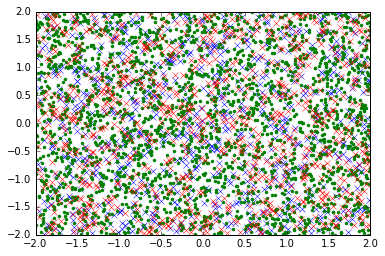

In [9]:
x_vals = []
y_vals = []
location = np.zeros((20000,3))
for n in range(20000):
    x = rndm.uniform(-2,2)
    x_vals.append(x)
    y = rndm.uniform(-2,2)
    y_vals.append(y)
for x in range(20000):
    s = (x_vals[x])**2+(y_vals[x])**2
    if s < 1:
        location[x,0]=1
        location[x,1]=0
        location[x,2]=0
    elif s< 4:
        location[x,1]=1
        location[x,2]=0
        location[x,0]=0
    else:
        location[x,2]=1
        location[x,0]=0
        location[x,1]=0      
total = np.zeros((20000,2))
classes =  np.zeros((20000,3))
total[:,0] = x_vals
total[:,1] = y_vals
classes = location
train = total[0:16000, :]
trainclass = classes[0:16000,:]
test = total[16000:20000, :]
testclass = classes[16000:20000,:]
model = Sequential()
model.add(Dense(64, input_dim=2))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(3))
model.add(Activation("softmax"))
model.compile(loss='mse',
              optimizer='sgd',
              metrics=['accuracy'])
model.fit(train, trainclass,  batch_size=30, nb_epoch=4,
verbose=1, validation_data=(test[:,0:2], testclass[:,0:3]))
net_score = model.predict_classes(test[:, 0:2], batch_size=30)
x_val1=[]
y_val1=[]
x_val2=[]
y_val2=[]
x_valout=[]
y_valout=[]

for n in range(4000):
    f = net_score[n]
    if location[n,0]==1:
        x_val1.append(test[n,0])
        y_val1.append(test[n,1])
    elif location[n,1]==1:
        x_val2.append(test[n,0])
        y_val2.append(test[n,1])
    else:
        x_valout.append(test[n,0])
        y_valout.append(test[n,1])
plt.plot(x_val1, y_val1, 'x')
plt.plot(x_val2, y_val2, '.')
plt.plot(x_valout, y_valout, 'x')


In [80]:
print classes

[[ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 ..., 
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]]


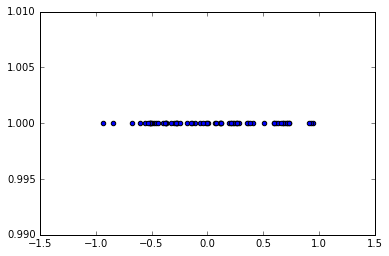

In [18]:
plt.scatter(train[1:100,0][train[1:100,2]>0], train[1:100,1][train[1:100,2]>0])
plt.scatter(train[1:100,0][train[1:100,2]==0], train[1:100,1][train[1:100,2]==0])
#plt.scatter(train[1:100,0], train[1:100,1])

In [4]:
def myregression(x):
    return 10*x-38

NameError: name 'newregression' is not defined

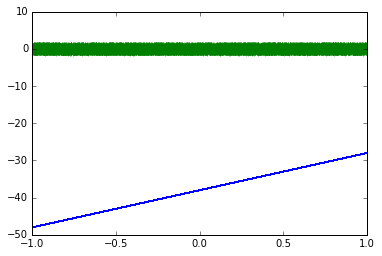

In [5]:
plt.plot(train[:,0], myregression(train[:,0]))
plt.plot(train[:,0], train[:,1], '+')
plt.plot(train[:,0], newregression(train[:,0]))
plt.title("Linear Regression of Median Home Price VS. Number of Rooms")
plt.xlabel("Number of Rooms")
plt.ylabel("Median Home Price")
plt.legend(["observation","original", "linear algebra solution"])

In [ ]:
x=train[:,0]
y=testing[:,1]
A=np.zeros((len(x),2))
A[:,0]=1
A[:,1]=x
reg = np.linalg.solve(A.T.dot(A),A.T.dot(y))
print reg
def newregression(x):
    return reg[1]*x + reg[0]

In [ ]:
testx=testing[:,0]
testy=testing[:,1]
ypredict = newregression(testx)
plt.plot(testx, testy, '.')
plt.plot(testx, ypredict, 'x')
error = (ypredict-testy)**2
print np.sum(error)/len(error)

**testing**

In [ ]:
def newline(x):
    return x**2+1
coordinates = np.zeros((1000000,2))
n=1000000
linex= np.linspace(0,10, 1000000)
coordinates[:,0] = np.random.uniform(0,2, n)
coordinates[:,1] = np.random.uniform(0,10, n)

linecomparey = newline(linex)
bottomgroupy = []
bottomgroupx = []
topgroupy = []
topgroupx = []
for n in range(1000000):
    q = coordinates[n,1]
    if q > newline(coordinates[n,0]):
        topgroupy.append(coordinates[n,1])
        topgroupx.append(coordinates[n,0])
    else:
        bottomgroupy.append(coordinates[n,1])
        bottomgroupx.append(coordinates[n,0])
plt.plot(bottomgroupx,bottomgroupy, 'or')
plt.plot(topgroupx,topgroupy, 'ob')
plt.plot(linex, linecomparey, 'x y')
plt.axis([0,3,0,10])

# binary classification